<a href="https://colab.research.google.com/github/JedRoundy/Predictive_Learning/blob/main/Checkpoint_MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### READ ME

Use the code blocks below to answer each quiz question. Only print the output required for each question. Do not edit the comments at the top of each code cell. Otherwise, the auto-grader may misinterpret your results. See Question 0 as an an example of how to complete a task (leave it in your notebook; don't delete it):

In [ ]:
# Question 0: Create a DataFrame with three rows and four columns. Name the
# columns 'Col1', 'Col2', 'Col3', 'Col4'. Create an index for the DataFrame
# and give the rows the index values of 'Row1', 'Row2', 'Row3'. Place a value
# in each column equal to the {ColumnName/RowName}. e.g. Col1/Row1. Print
# the entire DataFrame.

import pandas as pd

df = pd.DataFrame(columns=['Col1', 'Col2', 'Col3', 'Col4'], index=['Row1', 'Row2', 'Row3'])

for col in df:
  for i, value in df[col].items():
    df.at[i, col] = f'{i}/{col}'

df

,Col1,Col2,Col3,Col4
Row1,Row1/Col1,Row1/Col2,Row1/Col3,Row1/Col4
Row2,Row2/Col1,Row2/Col2,Row2/Col3,Row2/Col4
Row3,Row3/Col1,Row3/Col2,Row3/Col3,Row3/Col4


In [ ]:
##IS OLS assumptions - Linearity, Homoskedascitity, Autocorrelation, Multicollinearity,
##JB, Omnibus lower p value, more evidence errors are not normally distributed


#import all necessary libraries
import pandas as pd
import statsmodels.api as sm
from google.colab import drive
drive.mount('/content/drive')
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from datetime import datetime as dt
import seaborn as sns
import numpy as np



# Question 1: Import the datafile tw_tweets_users_media_places.csv that was
# provided with this checkpoint. Set tweet_id as the index. Print the number
# of records in this dataset in the output. How many records are there?

#import tweets file, set tweet_id as index column
df = pd.read_csv('/content/drive/MyDrive/455_Datasets/tw_tweets_users_media_places.csv', index_col = 'tweet_id')

#Print the num of records in dataset
print(len(df))

#534 records

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
534


In [ ]:
# Question 2: Make a copy of the DataFrame with all non-numeric features
# removed. Print out a list of the remaining columns in the output.

#create a new df with numeric data types
nn_df = df.select_dtypes(['float64', 'int64'])

#Print remaining columns
print(nn_df.columns.tolist())


# the first five records of this reduced dataset.
nn_df.head()



['context_annotations_count', 'count_annotations', 'count_cashtags', 'count_hashtags', 'count_mentions', 'count_urls', 'likes', 'quotes', 'referenced_tweet_count', 'replies', 'retweets', 'followers_count', 'following_count', 'tweet_count', 'listed_count', 'height', 'width']


,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,likes,quotes,referenced_tweet_count,replies,retweets,followers_count,following_count,tweet_count,listed_count,height,width
tweet_id,,,,,,,,,,,,,,,,,
1440484799970304000,1,0.0,0.0,0.0,0.0,1.0,14,0,0,8,0,2709,4999,96,15,405,813
1439618825171963904,2,2.0,0.0,3.0,0.0,1.0,7,0,0,0,0,140,735,99,0,2048,1536
1248872872837332992,3,0.0,0.0,0.0,0.0,1.0,49,1,0,0,20,7510,7260,100,103,288,278
1250729294051053568,1,2.0,0.0,3.0,0.0,2.0,3,0,0,0,1,7510,7260,100,103,2048,2048
1249612131433095168,1,2.0,0.0,3.0,0.0,2.0,15,2,0,0,21,7510,7260,100,103,2048,2048


In [ ]:
# Question 3: Using 'retweets' as the label, create an MLR model using all
# features except 'likes', 'quotes', 'replies', and the label. These features
# each represent outcomes, or alternatives to the label 'rewteets.' If our
# plan is to use this model to predict the popularity of new potential tweets,
# then we would not know what the likes, quotes, or replies will be. Therefore,
# we will eliminate them from the model.

#establish y and x
y = nn_df['retweets']
x = nn_df.assign(const = 1).drop(columns = ['retweets', 'likes' ,'quotes', 'replies'])


def regress(y,x):
  #model the regression
  model = sm.OLS(y,x)
  #fit model to data
  results = model.fit()
  #Print out the model results summary.
  return results

print(regress(y,x).summary())

                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     3.578
Date:                Sat, 18 Feb 2023   Prob (F-statistic):           3.81e-05
Time:                        05:16:33   Log-Likelihood:                -2328.2
No. Observations:                 534   AIC:                             4682.
Df Residuals:                     521   BIC:                             4738.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
context_annotations_co

In [ ]:
# Question 4: Add the scored (i.e. predicted) values for every record
# back into the original dataframe using the column label "model_1". Print
# the first five records.

estimates = regress(y,x).params.tolist()
intercept = estimates[-1]
estimates.pop()

predict_df = nn_df.drop(columns = ['retweets', 'likes', 'quotes', 'replies'])



for i, estimate in enumerate(estimates):
  predict_df['model_1'] = (predict_df.iloc[:,i] * estimate) + intercept

#Add the predicted values back into the original df
df['model_1'] = predict_df['model_1']
#print five records
df.head()

NameError: ignored

In [ ]:


# Question 5: Calculate and/or print the following five metrics for the
# model you ran in the prior steps: R-squared, R-squared adjusted, RMSE,
# MAE, and mean of the label column.
R_Squared = regress(y,x).rsquared
R_Squared_Adj = regress(y,x).rsquared_adj
RMSE = mean_squared_error(nn_df['retweets'], predict_df['model_1'], squared = False)
MAE = mean_absolute_error(nn_df['retweets'], predict_df['model_1'])
label_mean = df['retweets'].mean()

print(f'R-Squared: {R_Squared}')
print(f'R_Squared_Adj: {R_Squared_Adj}')

print(f'RMSE: {RMSE}')
print(f'MAE: {MAE}')

print(f'Retweet Mean: {label_mean}')


R-Squared: 0.0761444114441624
R_Squared_Adj: 0.05486558790736773
RMSE: 21.37025135440373
MAE: 11.862938189174223
Retweet Mean: 3.900749063670412


In [ ]:
# Question 6: We need to improve the model fit so that our predictions will
# be more accurate. Let's begin by incorporating the two date columns from
# the original dataset. Convert the features 'created_at_tweet' and
# 'created_at_author' to an integer representing the number of days since
# those dates until January 1st, 2022. Do not put these values into new
# columns. Replace the existing dates with those values.

# HINT: First, cast those columns to dt.date data types. Second, there are
# many ways to calculate the number of days until January 1, 2022. But I
# used the strptime() method of the datetime package to cast "2022-1-1"
# into a date, subtract the column value from that date, and then return
# the result in days (.dt.days).

# Print the first five records of this new dataset.

date_df = df.copy()



jan_date = dt.strptime('2022-1-1', '%Y-%m-%d').date()

for i, item in enumerate(df['created_at_author']):
  date_ = dt.strptime(item, '%Y-%m-%dT%H:%S:%f.000Z').date()
  date_df['created_at_author'].iloc[i] = int(str(jan_date - date_).rstrip(' 0,:days'))



for i,item in enumerate(df['created_at_tweet']):
  date_ = dt.strptime(item, '%Y-%m-%dT%H:%S:%f.000Z').date()
  date_df['created_at_tweet'].iloc[i] = int(str(jan_date - date_).rstrip(' 0,:days'))

date_df['created_at_tweet'] = date_df['created_at_tweet'].astype('int')
date_df['created_at_author'] = date_df['created_at_author'].astype('int')

date_df.head()

,text,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,created_at_tweet,lang,likes,...,protected,verified,media_type,height,width,preview_image_url,country,name_place,place_type,model_1
tweet_id,,,,,,,,,,,,,,,,,,,,,
1440484799970304000,This was my grandson this morning (w/autism)! ...,1,0.0,0.0,0.0,0.0,1.0,2021-09-22T01:15:13.000Z,en,14,...,False,False,photo,405,813,https://pbs.twimg.com/media/E_2hSs4UcAAIOK5.jpg,Canada,Langford,city,10.830575
1439618825171963904,Wow!! Been into #York for the first time since...,2,2.0,0.0,3.0,0.0,1.0,2021-09-19T15:54:09.000Z,en,7,...,False,False,photo,2048,1536,https://pbs.twimg.com/media/E_qNsE1X0AQmoK_.jpg,United Kingdom,Hessay,city,13.784816
1248872872837332992,Sad number of ppl who lost life due to covid-1...,3,0.0,0.0,0.0,0.0,1.0,2020-04-11T07:17:50.000Z,en,49,...,False,False,photo,288,278,https://pbs.twimg.com/media/EVTjQcoXsAAlrfq.jpg,United Kingdom,Maidstone,city,8.644518
1250729294051053568,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,2020-04-16T10:14:35.000Z,en,3,...,False,False,photo,2048,2048,https://pbs.twimg.com/media/EVt7pYTXkAMGzxj.jpg,United Kingdom,Maidstone,city,15.876893
1249612131433095168,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,2020-04-13T08:15:23.000Z,en,15,...,False,False,photo,2048,2048,https://pbs.twimg.com/media/EVeDlp7X0AMuN6X.jpg,United Kingdom,Maidstone,city,15.876893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377395135898656768,Save The Date! Returning this year is is our @...,0,0.0,0.0,0.0,0.0,1.0,2021-03-31T22:59:25.000Z,en,12,...,False,False,photo,1024,686,https://pbs.twimg.com/media/Ex19kv4WUAI8WkG.jpg,United States,NYPD - 41st Precinct,poi,10.311642
1303435852551462912,"Join SAFE, Paws For A Cause 4 Autism and All O...",1,0.0,0.0,0.0,0.0,1.0,2020-09-08T20:51:38.000Z,en,1,...,False,False,photo,2048,1582,https://pbs.twimg.com/media/Eha7_r_WkAACJDK.jpg,United States,Hilldale,city,13.972776
1246527727563345920,Today we have two reasons for celebration. Fir...,10,2.0,0.0,0.0,0.0,1.0,2020-04-04T19:59:04.000Z,en,1,...,False,False,photo,2048,1152,https://pbs.twimg.com/media/EUyOW1JXgAEnGWZ.jpg,United Kingdom,Middleton,city,12.215758


In [ ]:
# Question 7: Create another model that includes these two new columns
# representing the number of days since Jan 1, 2022. As before, eliminate
# all remaining non-numeric features and the other label candidates 'likes',
# 'quotes', and 'replies'.

# Print out the results summary.

# HINT: Do not forget that if you are using the same DataFrame that contained
# the 'model_1' predicted values column, you will need to drop that column as
# well. Otherwise, you are creating a new model to predict retweet count using
# a predicted value of retweet count from a prior model run which doesn't make
# any sense. However, you may have created a copy of the DataFrame in some
# prior task so that 'model_1' is not even in the DataFrame you are using now.
# In that case, this HINT is irrelevant.

#Reduce the df to only ints and floats
date_df = date_df.select_dtypes(['float64', 'int64']).drop(columns = ['model_1'])

#establish estimand and estimators
y = date_df['retweets']
x= date_df.drop(columns = ['likes', 'quotes', 'replies', 'retweets'])

print(regress(y,x).summary())

                                 OLS Regression Results                                
Dep. Variable:               retweets   R-squared (uncentered):                   0.105
Model:                            OLS   Adj. R-squared (uncentered):              0.081
Method:                 Least Squares   F-statistic:                              4.357
Date:                Sat, 18 Feb 2023   Prob (F-statistic):                    2.30e-07
Time:                        05:16:41   Log-Likelihood:                         -2330.0
No. Observations:                 534   AIC:                                      4688.
Df Residuals:                     520   BIC:                                      4748.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [ ]:
# Question 8: Once again, print out the fit metrics--R-squared, R-squared-adjusted,
# RMSE, MAE--as well as the label mean for this revised model.

#pull out the parameters and pop the intercept
estimates = regress(y,x).params.tolist()
intercept = estimates[-1]
estimates.pop()


predict_df = date_df.drop(columns = ['retweets', 'likes', 'quotes', 'replies'])

#for each row, estimate the num of retweets using recent results
for i, estimate in enumerate(estimates):
  predict_df['model_2'] = (predict_df.iloc[:,i] * estimate) + intercept

#calculate R, Radj, RMSE, MAE
r_sq = regress(y,x).rsquared
r_sq_adj = regress(y,x).rsquared_adj
RMSE = mean_squared_error(df['retweets'], predict_df['model_2'], squared = False)
MAE = mean_absolute_error(df['retweets'], predict_df['model_2'])
#print them out
print(f'R_Squared: {r_sq}')
print(f'R_Squared_Adj: {r_sq_adj}')
print(f'RMSE: {RMSE}')
print(f'MAE: {MAE}')
print(f'Retweet Mean: {label_mean}')

R_Squared: 0.10498335133727354
R_Squared_Adj: 0.08088674925789252
RMSE: 20.67770916495775
MAE: 6.237704291622898
Retweet Mean: 3.900749063670412


In [ ]:
# Question 9: We want to improve model fit even further by generating
# dummy codes for some of the categorical features that do not have too many
# group values like 'text' and 'url' do. In particular, generate dummy
# codes for 'lang', 'reply_settings', 'source', 'protected', 'verified', and
# 'terms' and include them in the original dataframe. Remove all remaining
# non-numeric features as well as the alternative labels 'likes', 'quotes',
# and 'replies'. As in #7, make sure you are not including the 'model_1'
# column of predicted values. Do not train the model again yet. You are
# just creating the dummy codes in this step.

#create columns
df_2 = df.drop(columns = ['text', 'preview_image_url', 'location','name_place', 'username', 'country','likes','replies', 'quotes', 'media_type', 'place_type', 'model_1'])
df_2['created_at_tweet'] = date_df['created_at_tweet']
df_2['created_at_author'] = date_df['created_at_author']
df_2 = pd.get_dummies(df_2, columns = ['lang', 'reply_settings', 'source', 'protected', 'verified', 'terms'], drop_first = True)


# Print out the first five records after the dummy codes are created.
df_2.head()

tweet_id
1440484799970304000     813
1439618825171963904    1536
1248872872837332992     278
1250729294051053568    2048
1249612131433095168    2048
                       ... 
1377395135898656768     686
1303435852551462912    1582
1246527727563345920    1152
1239010870128041984     540
1264967572174274560    1080
Name: width, Length: 534, dtype: int64

In [ ]:
# Question 10: Generate another model using all remaining numeric features
# along with these new dummy codes AND the days since dates features we
# created previously. Print out the results summary.

#establish estimand and estimators
y = df_2['retweets']
x = df_2.assign(const = 1).drop(columns = ['retweets'])

print(regress(y,x).summary())

                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     1.550
Date:                Sat, 18 Feb 2023   Prob (F-statistic):             0.0107
Time:                        05:16:41   Log-Likelihood:                -2308.0
No. Observations:                 534   AIC:                             4722.
Df Residuals:                     481   BIC:                             4949.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [ ]:
# Question 11: Now we have a fairly large number of features. But not all of
# them are significantly helping the model. Many of them have non-significant
# p-values or may be suffering from excessive multi-collinearity. Calculate
# the VIF score for each feature and add it to a new DataFrame. Sort the
# DataFrame from largest to smallest VIF score and display it in the output.
# HINT: There may be a function in the book to help you with this.


#create vif column
vif_df = pd.DataFrame(columns = ['VIF'])

#calculate vif scores using magical function
for col in df_2.drop(columns = 'retweets'):
  y = df_2[col]
  x = df_2.drop(columns = [col]).assign(const = 1)

  r_squared = sm.OLS(y,x).fit().rsquared

  if r_squared < 1: # Prevent division by zero runtime error
    vif_df.loc[col] = [1/(1 - r_squared)]
  else:
    vif_df.loc[col] = [float('inf')]

vif_df.sort_values(by =['VIF'], ascending = False)



/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF
count_mentions,inf
source_Twitter for iPhone,135.158752
source_Twitter for Android,129.883831
listed_count,22.855194
lang_en,21.336570
followers_count,20.987569
lang_und,13.447379
source_Twitter for iPad,12.511869
source_Hootsuite Inc.,5.246581
terms_covid19%20autism,4.950912


In [ ]:
# Question 12: We need to eliminate those features with excessive multi-collinearity.
# However, this may happen naturally as we remove those features with large p-values.
# Therefore, start by removing the feature with the highest p-value and then rerun
# the prior model. One-at-a-time, continue removing the feature with the highest p-value
# (rerunning the model each time) until the difference between R-squared and R-squared
# adjusted is <= 0.01 (rounded).

# Why would we do this? Because when R-squared adjusted is significantly lower than
# R-squared, we have too many variables in the model that are not significantly
# contributing to model fit. Once more, remove the highest p-value feature one-at-a-time
# until R-squared minus R-squared adjusted is <= 0.01 (rounded). You do NOT need to keep
# the results summary of every model. You can overwrite the prior model summary each time
# until you meet the criterion.

#Create function to test if R_sqd - R_sqd_adj is less than .01
def calcR(df_2, drop_this):
  #Reset the dataframe
  rtest_df = df_2.copy()
  #Establish y as an estimand
  y = rtest_df['retweets']
  #Establish estimators using droplist and rtest_df (has dates, dummies, and retweets)
  x = rtest_df.assign(const = 1).drop(columns = drop_list).drop(columns = ['retweets'])
  #calculate r_score
  R_score = regress(y,x).rsquared - regress(y,x).rsquared_adj
  #return relevant variables
  return R_score, y, x

#Create inital list of variable names
def get_vars(x):
  vars = x.drop(columns = ['const'])
  vars = x.columns.tolist()
  vars.pop()
  return vars

#Create list of p-values
def calc_pval(y,x):
  p_values = regress(y,x).pvalues.tolist()
  p_values.pop()
  return p_values


#Create dataframe from variable names and p values

def create_pval_df(y,x, vars, p_values):
  p_val_df = pd.DataFrame({'p_val': p_values, 'variables': vars})
  #sort values from high to low, apply to df
  p_val_df = p_val_df.sort_values(by = ['p_val'], ascending = False).reset_index()
  #drop the new index created, apply to df
  p_val_df.drop(columns = ['index'], inplace = True)
  return p_val_df


#initialize loop bool
loop = True
#initialize dropping variables
drop_list = []
drop_this = ''
while loop == True:
  #return R sqd - R sqq adj and assign Rscore, y, x
  R_score, y, x = calcR(df_2, drop_this)
  print(R_score)
  #if Rscore is low enough, break loop
  if round(R_score, 2) <= .01:
    loop = False
    print('R_squared - R_squared adjusted is less than, or equal to, .01.')
  #else, add the most eggregious variable to drop list, rerun the p_valdf
  else:
    p_val_df = create_pval_df(y, x, get_vars(x), calc_pval(y,x))
    drop_this = p_val_df['variables'][0]
    print(drop_this)
    drop_list.append(drop_this)

,p_val,variables
0,1.947572e-01,referenced_tweet_count
1,1.736855e-01,terms_coronavirus%20autistic
2,1.674040e-01,created_at_tweet
3,1.175263e-01,count_urls
4,1.102669e-01,count_hashtags
5,2.723198e-02,terms_covid19%20autism
6,8.933860e-03,terms_coronavirus%20autism
7,1.504385e-06,source_Twitter for iPad
8,1.943782e-08,followers_count


In [ ]:
# Question 13: For the remaining features in the last model you produced
# where the difference between R2 and R2-adj is <= 0.01, calculate the VIF
# scores and print them out in a table from largest VIF to smallest.
vif_df = pd.DataFrame(columns = ['VIF'])

df_7 = df_2.drop(columns = drop_list[0:-2])

for col in df_7.drop(columns = 'retweets'):
  y = df_7[col]
  x = df_7.assign(const = 1).drop(columns = [col])

  r_squared = sm.OLS(y,x).fit().rsquared

  if r_squared < 1: # Prevent division by zero runtime error
    vif_df.loc[col] = [1/(1 - r_squared)]
  else:
    vif_df.loc[col] = [float('inf')]

vif_df.sort_values(by =['VIF'], ascending = False)


,VIF
terms_covid19%20autism,1.177597
count_hashtags,1.150177
terms_coronavirus%20autism,1.110618
terms_covid%20autism,1.098775
followers_count,1.089592
created_at_tweet,1.079115
count_urls,1.069406
source_Twitter for iPad,1.063977
referenced_tweet_count,1.052960
terms_coronavirus%20autistic,1.044223


In [ ]:
# Question 14: Now we have a nice and trim model. However, we cannot
# compare the coefficients to each other since they are each on different
# scales. Therefore, use a Min-Max normalization to convert all features
# and label to the same scale. Print out the first five records.
df_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_7), columns=df_7.columns)


df_minmax.head()



,count_hashtags,count_urls,created_at_tweet,referenced_tweet_count,retweets,followers_count,source_Twitter for iPad,terms_coronavirus%20autism,terms_coronavirus%20autistic,terms_covid%20autism,terms_covid19%20autism
0,0.00,0.0,0.148872,0.0,0.000000,0.004192,0.0,0.0,0.0,1.0,0.0
1,0.12,0.0,0.153383,0.0,0.000000,0.000217,0.0,0.0,0.0,1.0,0.0
2,0.00,0.0,0.091729,0.0,0.060606,0.011620,0.0,0.0,0.0,0.0,0.0
3,0.12,0.5,0.936842,0.0,0.003030,0.011620,0.0,1.0,0.0,0.0,0.0
4,0.12,0.5,0.941353,0.0,0.063636,0.011620,0.0,1.0,0.0,0.0,0.0


In [ ]:
# Question 15: Rerun your last model using the normalized values. Print
# the results summary.

y = df_minmax['retweets']
x = df_minmax.assign(const = 1).drop(columns = ['retweets'])

print(regress(y,x).summary())



                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     7.421
Date:                Sat, 18 Feb 2023   Prob (F-statistic):           4.60e-11
Time:                        05:16:55   Log-Likelihood:                 782.79
No. Observations:                 534   AIC:                            -1544.
Df Residuals:                     523   BIC:                            -1497.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
count_hashtags  

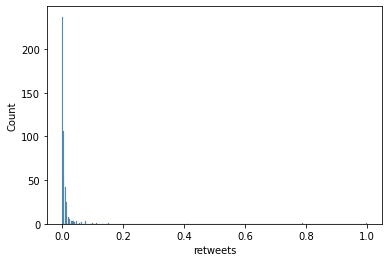

In [ ]:
# Question 16: Now that we have addressed multi-collinearity and have
# standardized the features, we should examine and address skewness. Print
# the skewness score for the label 'retweets'. In addition, use the .histplot()
# object from the seaborn package to print out a histogram of 'retweets'.

df_minmax['retweets'].skew()

sns.histplot(df_minmax['retweets'])

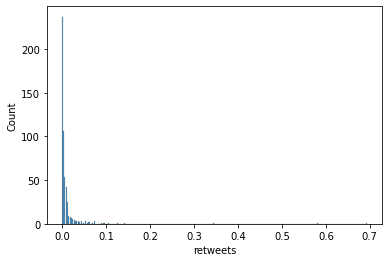

In [ ]:
# Question 17: The skewness of retweets is clearly very extreme. However, we cannot
# create a natural log transformation since there are zero values (ln(0) = undefined).
# Therefore, we need to +1 to all values before we calculate the natural log.
# Thankfully, there is a numpy method for that: np.log1p(). Convert the 'retweets'
# label to a natural log +1. Print out the new skewness and histogram.

df_minmax['retweets'] = np.log1p(df_minmax['retweets'])

sns.histplot(df_minmax['retweets'])

In [ ]:
# Question 18: Rerun the last MLR model using this new natural log +1 version
# of 'retweets'. Print out the results summary.
y = df_minmax['retweets']
x = df_minmax.assign(const = 1).drop(columns = ['retweets'])
print(regress(y,x).summary())


                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     8.839
Date:                Sat, 18 Feb 2023   Prob (F-statistic):           1.79e-13
Time:                        05:17:04   Log-Likelihood:                 947.76
No. Observations:                 534   AIC:                            -1874.
Df Residuals:                     523   BIC:                            -1826.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
count_hashtags  